# Don Quixote model finetuned from GPT-2

In [1]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt

from finetune.gpt2.finetune import get_model, evaluate

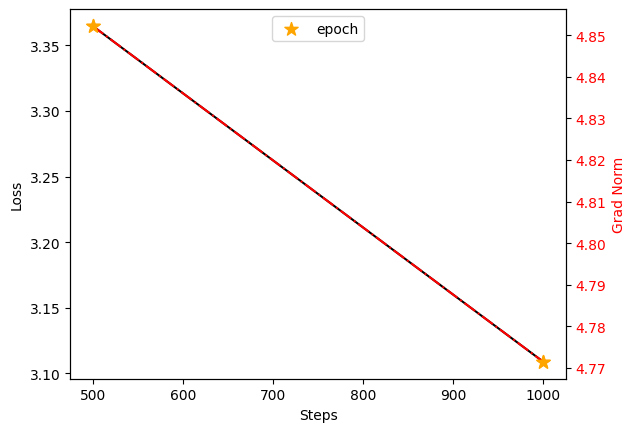

In [2]:
log = EventAccumulator('./checkpoints/runs/Apr25_10-49-42_gn-0/events.out.tfevents.1714034983.gn-0.9755.0')
log.Reload()

loss = [event.value for event in log.Scalars("train/loss")]
grad_norm = [event.value for event in log.Scalars("train/grad_norm")]
steps = [event.step for event in log.Scalars("train/loss")]

fig, ax1 = plt.subplots()

ax1.set_xlabel('Steps')
ax1.set_ylabel('Loss', color="black")
ax1.plot(steps, loss, color="black")
ax1.tick_params(axis='y', labelcolor="black")
ax1.scatter(steps, loss, color="orange", marker="*", label="epoch", zorder=10, s=100)
ax1.legend(loc="upper center")

ax2 = ax1.twinx()
ax2.set_ylabel('Grad Norm', color="red")
ax2.plot(steps, grad_norm, color="red", linestyle="-.")
ax2.tick_params(axis='y', labelcolor="red")
ax2.scatter(steps, grad_norm, color="orange", marker="*", zorder=10, s=100)

plt.show()

In [3]:
models = {
    "epoch 1": "./checkpoints/checkpoint-261",
    "epoch 2": "./checkpoints/checkpoint-522",
    "epoch 3": "./checkpoints/checkpoint-783",
    "epoch 4": "./checkpoints/checkpoint-1044",
}

In [4]:
prompts = ["Here is the apple of which I spoke,",
           "I will kill you!"]
temperatures = [1.0]
maximum = 100
top_k = None

In [5]:
for which, tag in models.items():
    model = get_model(tag)
    
    for temperature in temperatures:
        print(f"\n\033[91m Temperature:\033[0m {temperature}")
        for prompt in prompts:
            print(f"\n\033[92m Prompt:\033[0m {prompt}")
            
            output = evaluate(model, prompt, generate=maximum, temperature=temperature, top_k=top_k)
            print(f"\033[91m {which}:\n\033[0m {output} ...")


 Temperature: 1.0

 Prompt: Here is the apple of which I spoke,
 epoch 1:
 Here is the apple of which I spoke,” said Don Quixote, “and it is a very good one, for I have seen it before, and I know it well enough to know how to make it; but let me tell you, Sancho, that if it were not for your worship’s good fortune, it would not have been possible for me to have made it. I mean to say, sirs, to all who are in the habit of making ...

 Prompt: I will kill you!
 epoch 1:
 I will kill you!” said Don Quixote, “for I know not what to do with your worship’s life; but if it were not for me, I should have killed you, and I would have done so, for it is my duty to take care of your honour and honour as well as I can; and if I had not done it, it would not have been possible for you to have known that I was going to kill myself; for I am ...

 Temperature: 1.0

 Prompt: Here is the apple of which I spoke,
 epoch 2:
 Here is the apple of which I spoke,” said Don Quixote, “for it is a very good on